### **CUREYA WEEK 5 TASK - Stock Price Prediction - Apple**

Executed by: Kriti Yadav | ykriti288@gmail.com

### **Importing Libraries**

In [1]:
import pandas_datareader as web
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns. set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings(action='ignore')

### **Loading Dataset**

In [2]:
url="https://raw.githubusercontent.com/kriti818/Cureya/main/AAPL.csv"
test = pd.read_csv(url)
test_df = pd.read_csv(url)
test 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610315,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678085,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818838,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952841,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932299,394024400
...,...,...,...,...,...,...,...
1998,2019-12-11,67.202499,67.775002,67.125000,67.692497,66.799057,78756800
1999,2019-12-12,66.945000,68.139999,66.830002,67.864998,66.969292,137310400
2000,2019-12-13,67.864998,68.824997,67.732498,68.787498,67.879601,133587600
2001,2019-12-16,69.250000,70.197502,69.245003,69.964996,69.041557,128186000


### **Data Visualization**

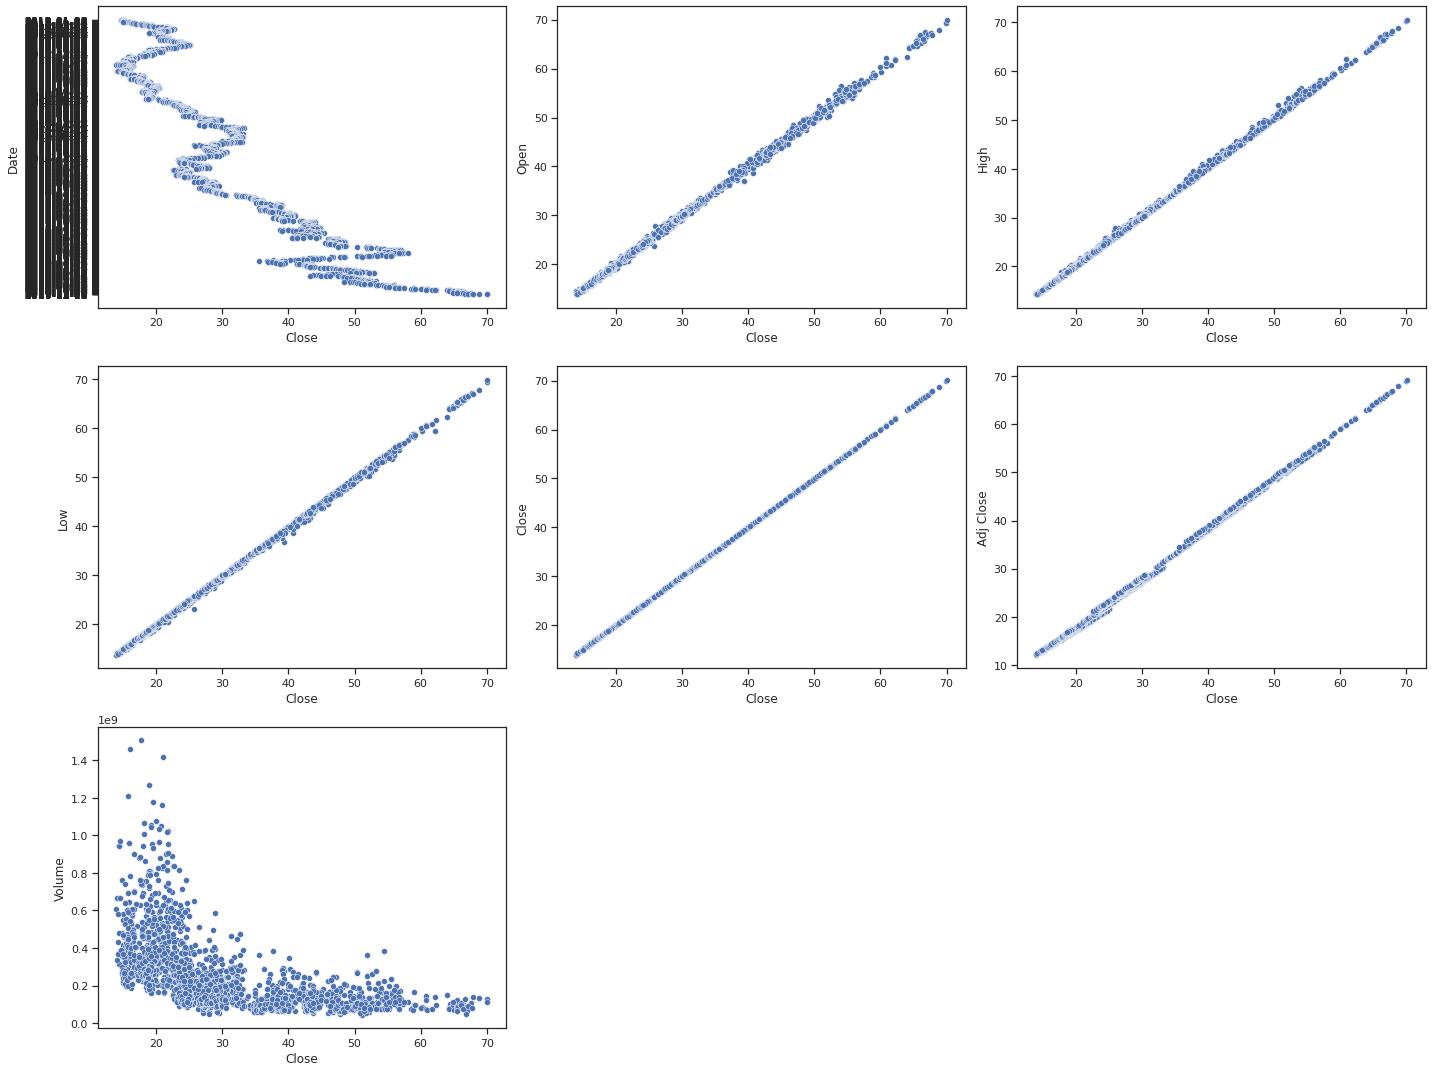

In [3]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in test:
    if plotnumber<=7 :
        ax = plt.subplot(3, 3, plotnumber)
        sns.scatterplot(x = test['Close'], y = test[column])
    
    plotnumber += 1
    

plt.tight_layout()
plt.show()

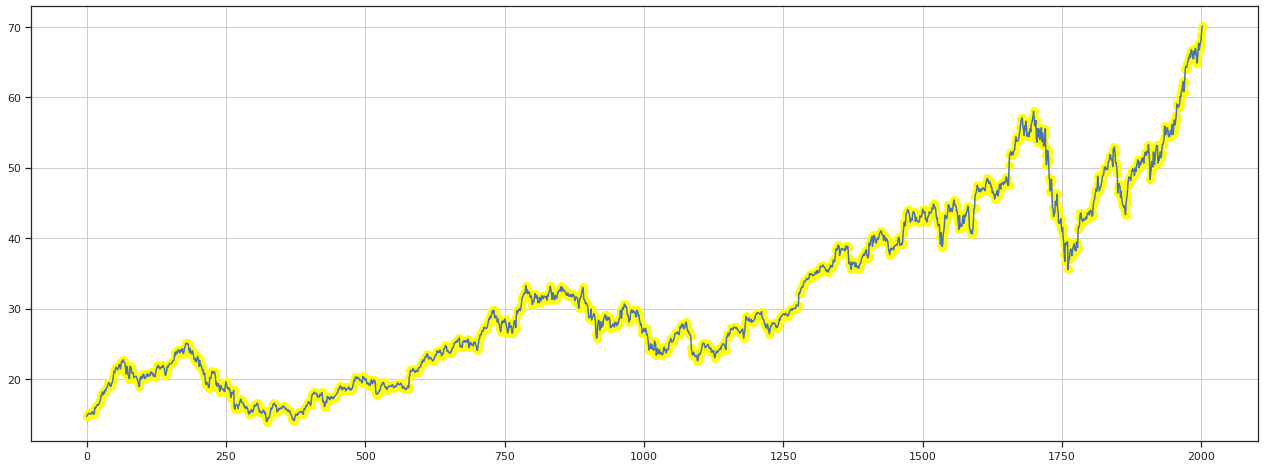

In [4]:
plt.figure(figsize=(22,8))
plt.scatter(test.index,test["Close"],color="Yellow",lw=3)
plt.plot(test.index,test["Close"])
plt.grid(True)
plt.show()

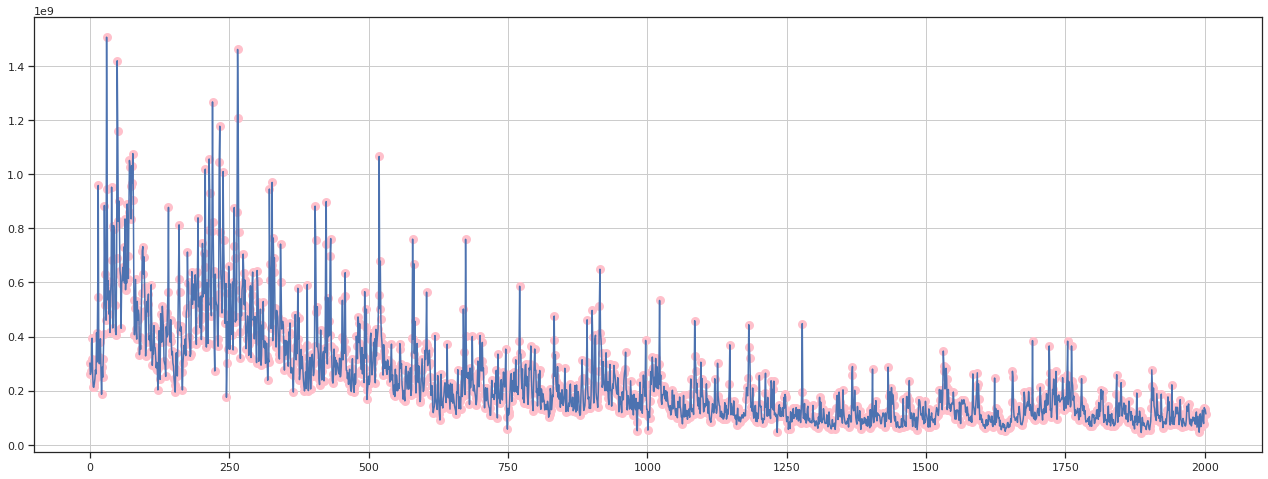

In [5]:
plt.figure(figsize=(22,8))
plt.scatter(test.index,test["Volume"],color="pink",lw=3)
plt.plot(test.index,test["Volume"])
plt.grid(True)
plt.show()

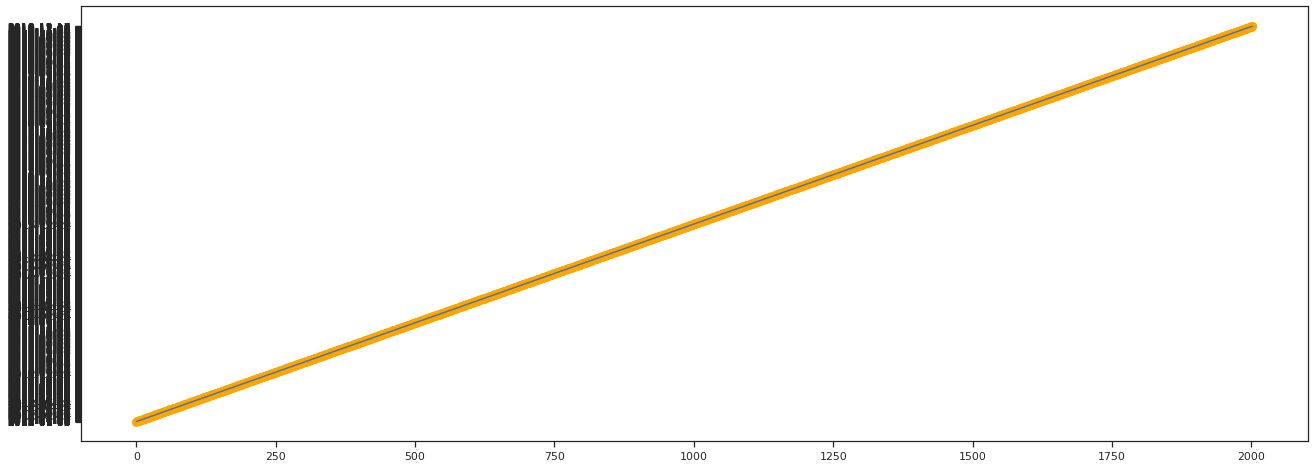

In [6]:
plt.figure(figsize=(22,8))
plt.scatter(test.index,test["Date"],color="orange",lw=3)
plt.plot(test.index,test["Date"])
plt.show()

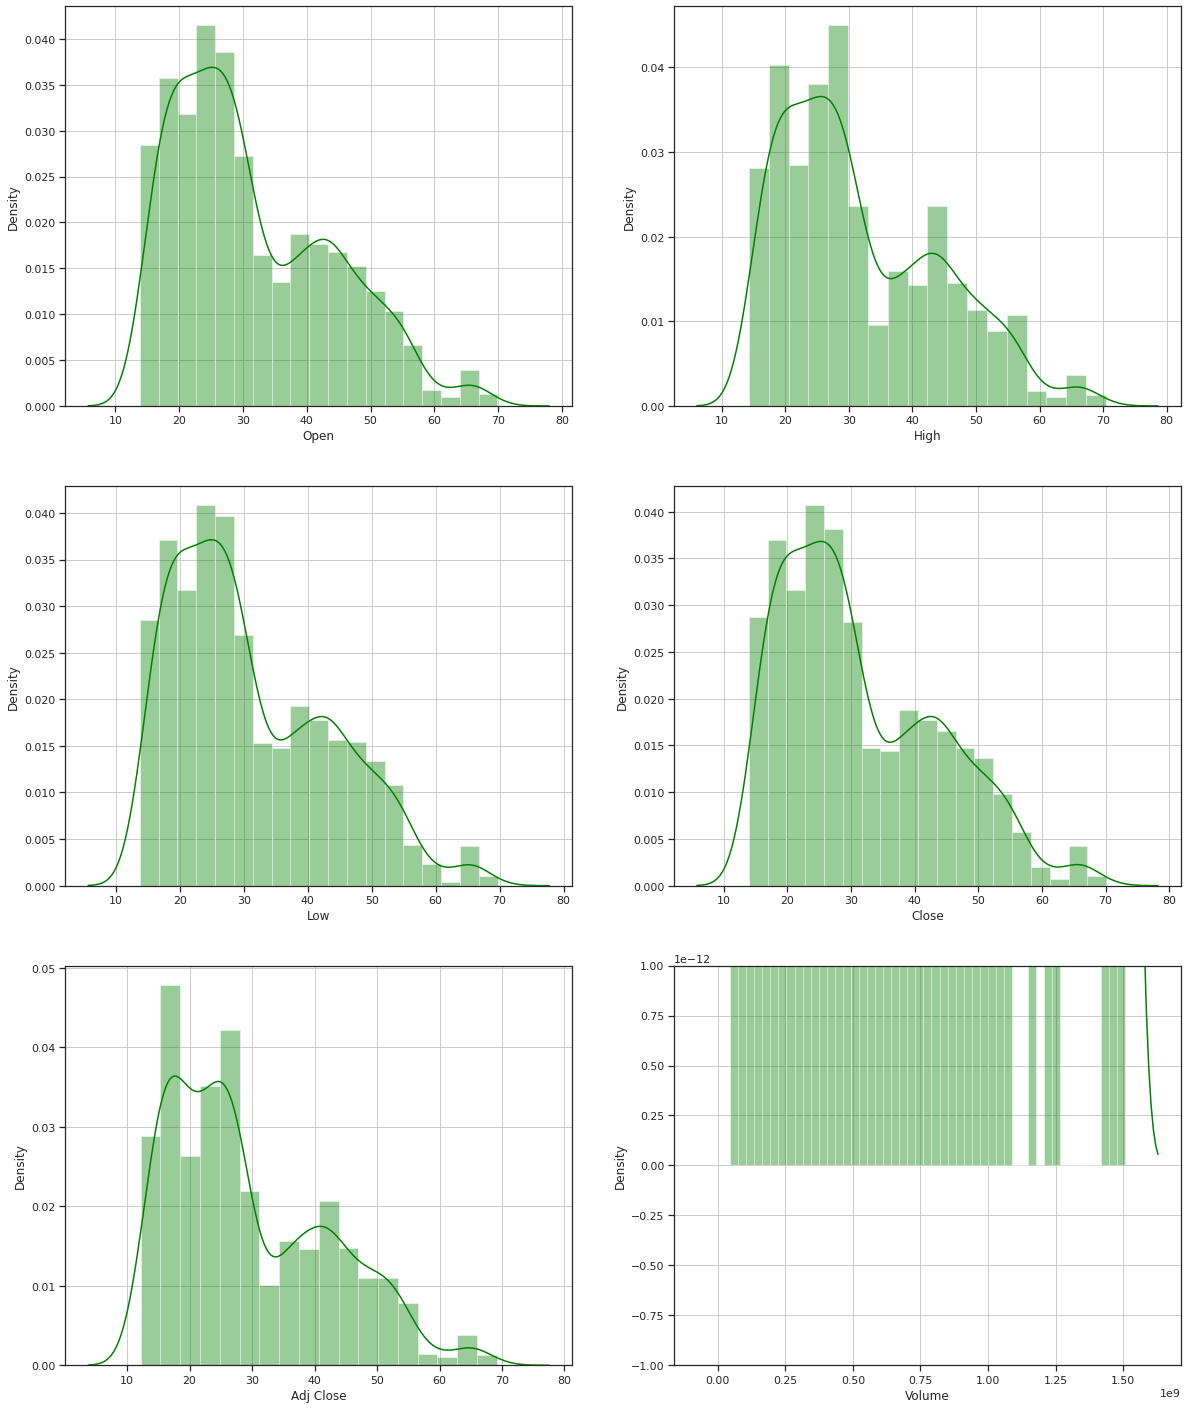

In [7]:

fig, ax1 = plt.subplots(3,2, figsize=(20,25))
k = 1
columns = list(test.columns)
for i in range(3):
    for j in range(2):
            sns.distplot(test[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

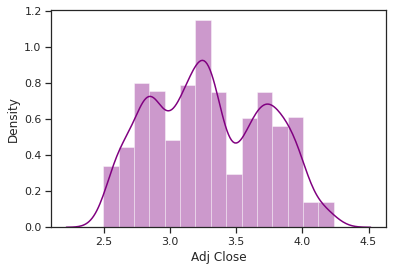

In [8]:

def log_transform(col):
    return np.log(col[0])

test["Adj Close"]=test[["Adj Close"]].apply(log_transform, axis=1)

sns.distplot(test["Adj Close"], color = 'purple')
plt.grid(False)
plt.show()

In [9]:
test.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999775,0.999709,0.999480,0.979787,-0.562159
High,0.999775,1.000000,0.999646,0.999739,0.979901,-0.559032
Low,0.999709,0.999646,1.000000,0.999763,0.980076,-0.567760
Close,0.999480,0.999739,0.999763,1.000000,0.980102,-0.563906
Adj Close,0.979787,0.979901,0.980076,0.980102,1.000000,-0.627271
Volume,-0.562159,-0.559032,-0.567760,-0.563906,-0.627271,1.000000


Text(0.5, 1.0, 'Multi-Collinearity of Stock Attributes')

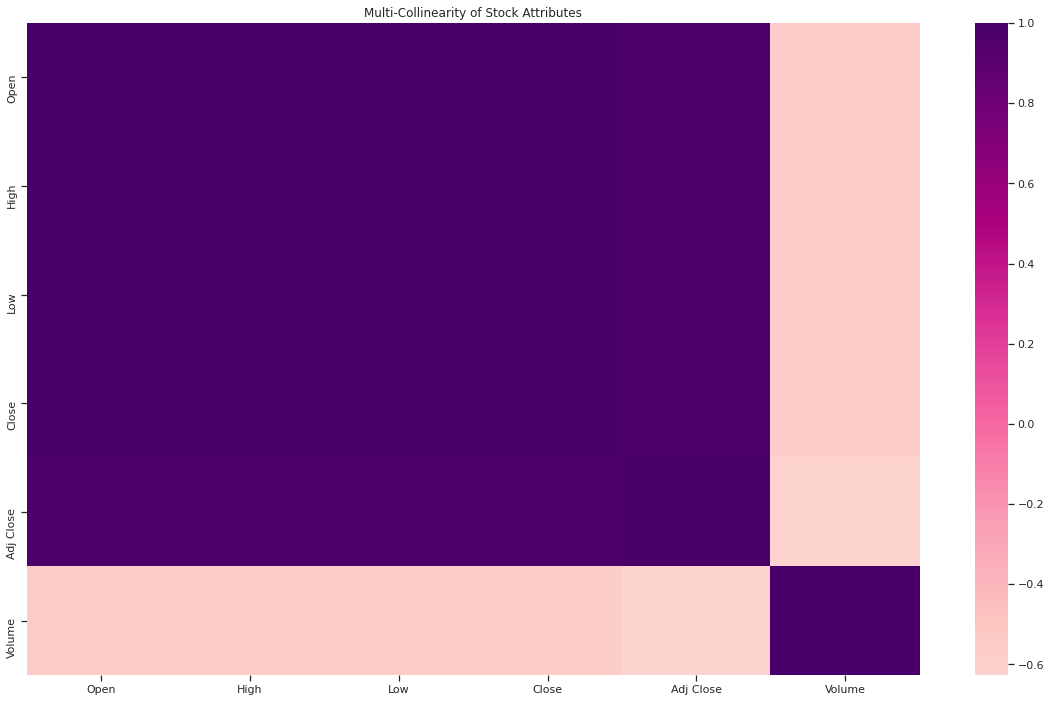

In [10]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(test.corr(), center=0, cmap='RdPu')
ax.set_title('Multi-Collinearity of Stock Attributes')

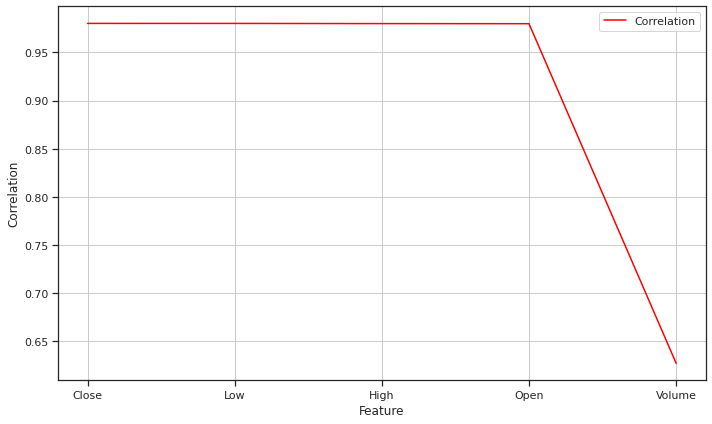

In [11]:
corr=abs(test.corr())
plt.figure(figsize=(10,6))
plt.plot(corr["Adj Close"].sort_values(ascending=False)[1:],label="Correlation",color="red")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

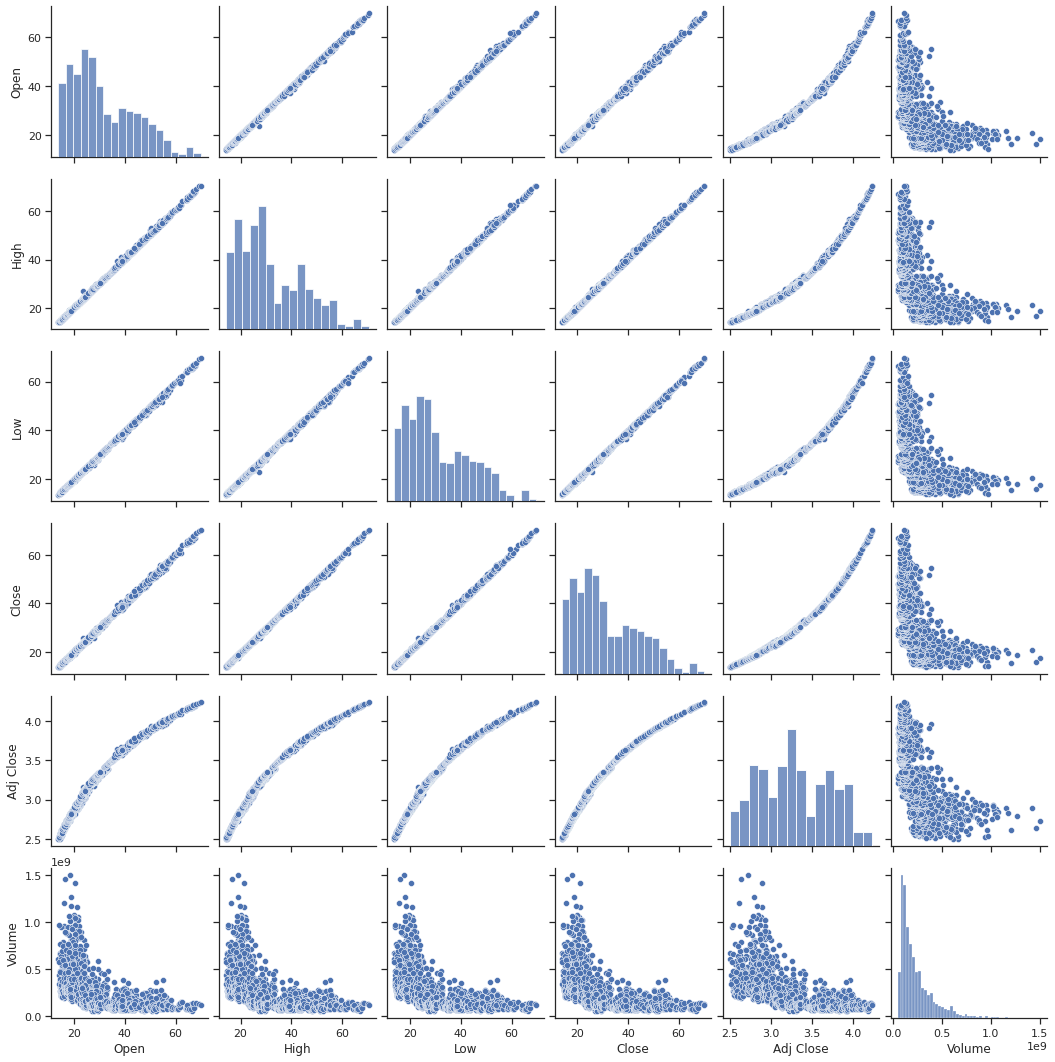

In [12]:
sns.pairplot(test )

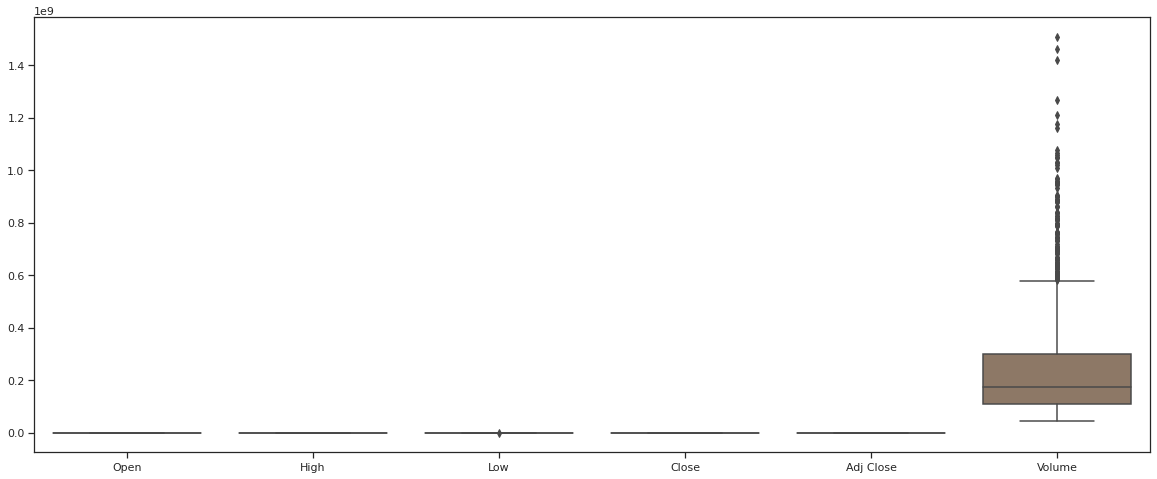

In [13]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = test, width = 0.8)
plt.show()

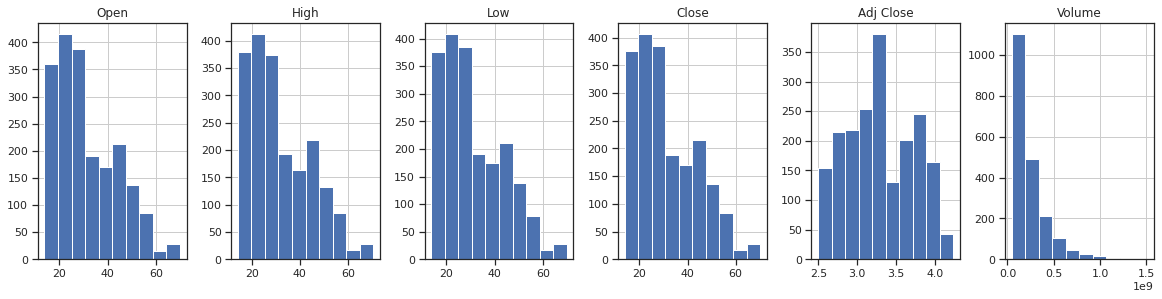

In [14]:
test.hist(figsize=(20,10),layout=(2,6))
plt.show()

In [15]:
data = test.filter(['Close'])
dataset = data.values
len(dataset)

2003

In [16]:
dataset

array([[14.686786],
       [14.765714],
       [14.929643],
       ...,
       [68.787498],
       [69.964996],
       [70.102501]])

In [17]:
data

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786
...,...
1998,67.692497
1999,67.864998
2000,68.787498
2001,69.964996


Here, I only use Close values to predict the stocks price

### **Fixing Training size of the dataset**

In [19]:
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1603

Used 80% of data for training purpose.

### **Data Normalization**

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data.shape)
print(scaled_data)

(2003, 1)
[[0.0131651 ]
 [0.01457063]
 [0.01748986]
 ...
 [0.97658262]
 [0.99755133]
 [1.        ]]


Here, I used MinMax Scaler to scale the data between 0 and 1.

### **Splitting the dataset into training and testing data**

In [21]:
train_data = scaled_data[0:training_data_len, :]
print(len(train_data))
x_train, y_train = [], []

for i in range(100, len(train_data)):
  x_train.append(train_data[i-100:i, 0])
  y_train.append(train_data[i,0])
  if i<=101:
    print(x_train)
    print(y_train)

1603
[array([0.0131651 , 0.01457063, 0.01748986, 0.02026915, 0.01984304,
       0.02080338, 0.02036454, 0.0196268 , 0.01862192, 0.02173194,
       0.02453667, 0.02367173, 0.01893356, 0.02345549, 0.01900353,
       0.03569839, 0.03440732, 0.03609271, 0.03973694, 0.04194383,
       0.04175942, 0.04107891, 0.04397904, 0.04670743, 0.0497984 ,
       0.05479095, 0.0652785 , 0.0654375 , 0.07127595, 0.07563886,
       0.0681405 , 0.07102789, 0.07097067, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600557, 0.09214292, 0.09661394,
       0.09790501, 0.0983566 , 0.09071196, 0.08886754, 0.08914104,
       0.09632779, 0.09835024, 0.10269409, 0.11293359, 0.12659476,
       0.12403805, 0.12404441, 0.13392141, 0.13701237, 0.1348118 ,
       0.13280208, 0.13070964, 0.13766104, 0.14243104, 0.14442806,
       0.13949272, 0.13293562, 0.14507041, 0.15186918, 0.14868284,
       0.15464215, 0.15626391, 0.15130952, 0.14988489, 0.14770341,
       0.13654805, 0.12058461, 0.13939097, 0.13852602, 0

In [22]:
test_data = scaled_data[training_data_len: , :]
print(len(test_data))
x_test, y_test = [], []

for i in range(100, len(test_data)):
  x_test.append(test_data[i-100:i, 0])
  y_test.append(train_data[i,0])
  if i<=101:
    print(x_test)
    print(y_test)

400
[array([0.58409759, 0.58107022, 0.58694685, 0.58485443, 0.59019677,
       0.58926182, 0.5911762 , 0.58814883, 0.58636808, 0.58356332,
       0.59856647, 0.60564508, 0.61223397, 0.61521678, 0.61290181,
       0.60506631, 0.60297388, 0.60764846, 0.60061434, 0.60105957,
       0.59233369, 0.59188853, 0.57831004, 0.58191611, 0.57728611,
       0.57488201, 0.56263911, 0.57270052, 0.57149854, 0.57746415,
       0.57572789, 0.58494341, 0.57043005, 0.57701892, 0.5884605 ,
       0.60008012, 0.59905621, 0.58805984, 0.60208351, 0.6034191 ,
       0.60154929, 0.60395331, 0.59927874, 0.60586769, 0.60390883,
       0.60466565, 0.61085388, 0.61895648, 0.61624079, 0.60186089,
       0.59709733, 0.59878902, 0.64869556, 0.67491763, 0.67758882,
       0.68239696, 0.67367108, 0.67429435, 0.68155107, 0.6755409 ,
       0.68150651, 0.68542426, 0.68760574, 0.7013178 , 0.72028313,
       0.71084501, 0.70897511, 0.70901968, 0.71097855, 0.71396136,
       0.72188586, 0.72972128, 0.74432372, 0.75345026, 0.

Convert Training and Testing Data to Right Shape

In [23]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
print(x_train.shape, y_train.shape)

(1503, 100, 1) (1503,)


In [24]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape, y_test.shape)

(300, 100, 1) (300,)


### **RNN model (LSTM)**

In [25]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

Model Compilation

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________



Training the LSTM Model

In [28]:
lstm_model = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 64, epochs=100, verbose=1)

Epoch 1/100
24/24 [==============================] - 11s 239ms/step - loss: 0.0131 - val_loss: 0.3505
Epoch 2/100
24/24 [==============================] - 5s 188ms/step - loss: 9.6850e-04 - val_loss: 0.3202
Epoch 3/100
24/24 [==============================] - 4s 187ms/step - loss: 5.1588e-04 - val_loss: 0.3272
Epoch 4/100
24/24 [==============================] - 4s 187ms/step - loss: 4.7790e-04 - val_loss: 0.3410
Epoch 5/100
24/24 [==============================] - 4s 187ms/step - loss: 4.8416e-04 - val_loss: 0.3448
Epoch 6/100
24/24 [==============================] - 5s 188ms/step - loss: 5.0072e-04 - val_loss: 0.3348
Epoch 7/100
24/24 [==============================] - 4s 187ms/step - loss: 4.9361e-04 - val_loss: 0.3126
Epoch 8/100
24/24 [==============================] - 5s 188ms/step - loss: 4.6022e-04 - val_loss: 0.3492
Epoch 9/100
24/24 [==============================] - 4s 188ms/step - loss: 4.4947e-04 - val_loss: 0.3362
Epoch 10/100
24/24 [==============================] - 5s 1


Visualize Loss

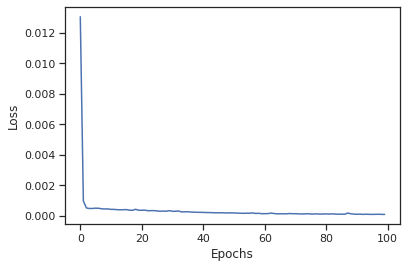

In [29]:
plt.plot(lstm_model.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Making Prediction

In [30]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

In [31]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [32]:
print(train_predictions.shape, test_predictions.shape)

(1503, 1) (300, 1)


### **Evaluation Metrix**

In [33]:
math.sqrt(mean_squared_error(y_train,train_predictions))

28.257917304050235

In [34]:
math.sqrt(mean_squared_error(y_test,test_predictions))

51.10851925652533

### **Plot the Graph to visualize the Predicted stocks**

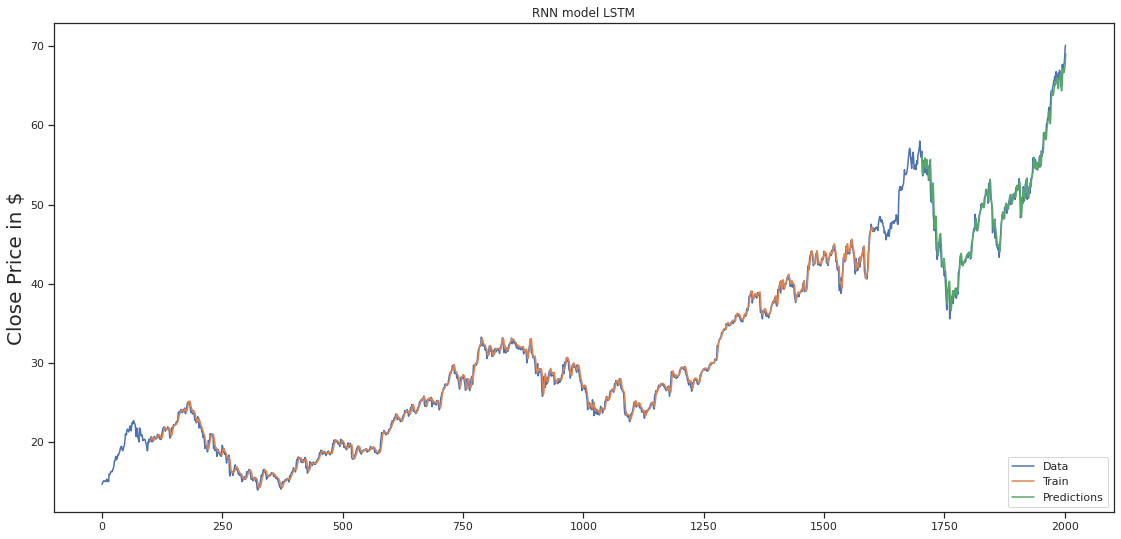

In [36]:
# train predictions
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[100:len(train_predictions)+100, :] = train_predictions
# test predictions
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predictions)+(100*2):len(dataset), :] = test_predictions

plt.figure(figsize = (19,9))
plt.title('RNN model LSTM')
plt.ylabel('Close Price in $', fontsize = 20)

plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Data', 'Train', 'Predictions'], loc='lower right')
plt.show()